In [17]:
!pip install imblearn --quiet

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

df = pd.read_csv('cleaned_dataset.csv')

In [19]:
df.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,Power
0,1.0,-0.947770,-0.944225,0.272686,0.235748,-1.703463,0.0,0.626122
1,0.0,-0.897715,-0.876822,-0.838095,0.631532,-1.656112,0.0,0.494763
2,0.0,-0.947770,-1.011628,-0.139002,0.982082,-1.624544,0.0,1.465392
3,0.0,-0.897715,-0.944225,-0.643902,-0.137419,-1.592977,0.0,-0.451200
4,0.0,-0.897715,-0.876822,-0.838095,-0.080878,-1.561409,0.0,-0.482431


In [20]:
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score,classification_report
import time
from sklearn.metrics import ConfusionMatrixDisplay

model_performance = pd.DataFrame(columns=['Accuracy','Precison','Recall','F1-Score','Training time','Prediction time'])


#define a function so as to score a function

def log_scores(model_name, y_test, y_predictions, start, end_train, end_predict):
    accuracy = accuracy_score(y_test, y_predictions)
    precision = precision_score(y_test, y_predictions, average='weighted')
    recall = recall_score(y_test, y_predictions, average='weighted')
    f1 = f1_score(y_test, y_predictions, average='weighted')
    model_performance.loc[model_name] = [accuracy, precision, recall, f1, end_train-start, end_predict-end_train]

def evaluate_model(model, model_name):
    start = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()
    y_predictions = model.predict(X_test)
    end_predict = time.time()

    log_scores(model_name, y_test, y_predictions, start, end_train, end_predict)
    print(f"{model_name}\n" + classification_report(y_test, y_predictions))

    ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)
    plt.show()
    
     # Save the trained model using pickle
    with open(f'{model_name.lower().replace(" ", "_")}_model.pkl', 'wb') as f:
        pickle.dump(model, f)
        print(f"Model saved as {model_name.lower().replace(' ', '_')}_model.pkl")

    

## **Data splitting and sampling**

In [21]:
df.columns

Index(['Type', 'Air temperature', 'Process temperature', 'Rotational speed',
       'Torque', 'Tool wear', 'Machine failure', 'Power'],
      dtype='object')

In [22]:
df.dtypes

Type                   float64
Air temperature        float64
Process temperature    float64
Rotational speed       float64
Torque                 float64
Tool wear              float64
Machine failure        float64
Power                  float64
dtype: object

## **Split the dataset in 7:3**

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop(["Machine failure"],axis = 1)
y = df["Machine failure"]

#Split the data into training and test set\
X_train,X_test , y_train,y_test = train_test_split(X,y,
                                                  test_size = 0.3,
                                                  random_state = 0,
                                                  stratify = y)

Because the data is imbalanced, we oversample the training set

In [24]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SVMSMOTE

oversample = SVMSMOTE(random_state = 42)
#oversample = RandomOverSampler(random_state = 42)

X_train, y_train = oversample.fit_resample(X_train, y_train)

(array([6406.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6406.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

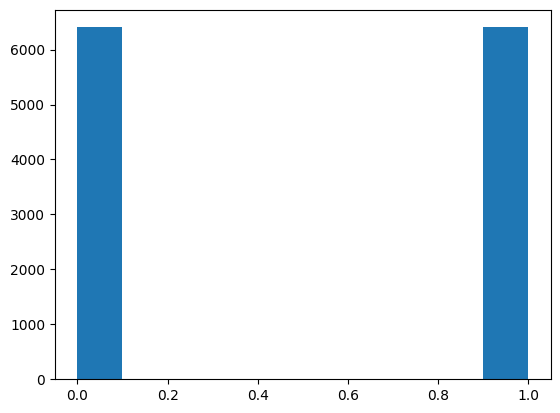

In [25]:
plt.hist(y_train)

## **Decision Tree Classifier**

Decision Tree
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      2746
         1.0       0.40      0.72      0.51        74

    accuracy                           0.96      2820
   macro avg       0.70      0.84      0.75      2820
weighted avg       0.98      0.96      0.97      2820



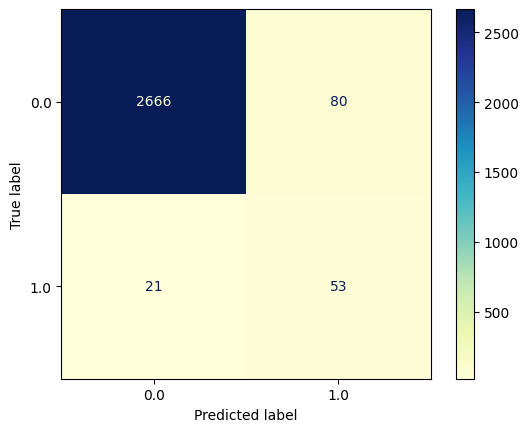

Model saved as decision_tree_model.pkl


In [26]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=8)
evaluate_model(decision_tree, "Decision Tree")

## **k-NN (K -nearest Neighbors)**

k-NN
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2746
         1.0       0.51      0.49      0.50        74

    accuracy                           0.97      2820
   macro avg       0.75      0.74      0.74      2820
weighted avg       0.97      0.97      0.97      2820



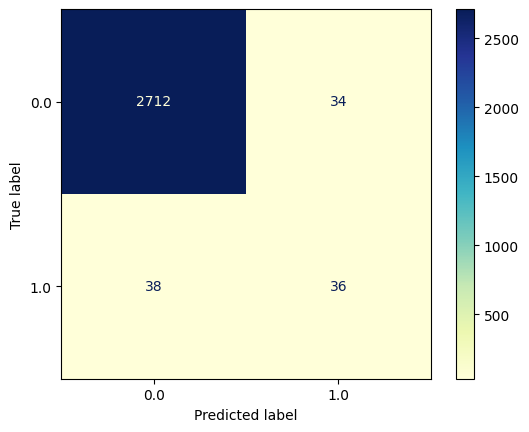

Model saved as k-nn_model.pkl


In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
evaluate_model(knn, "k-NN")


## **Random Forest Model**

Random Forest
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2746
         1.0       0.61      0.62      0.61        74

    accuracy                           0.98      2820
   macro avg       0.80      0.81      0.80      2820
weighted avg       0.98      0.98      0.98      2820



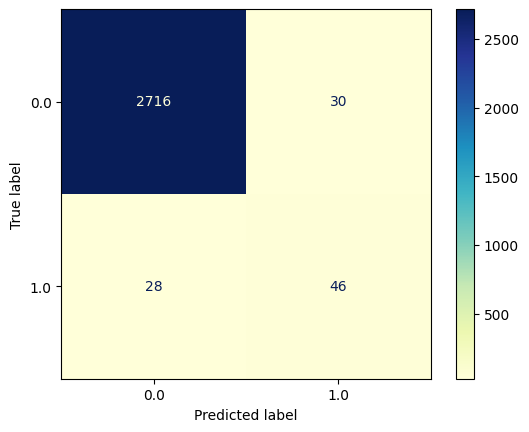

Model saved as random_forest_model.pkl


In [28]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0, bootstrap=True)
evaluate_model(random_forest, "Random Forest")

## **Gradient Boosting Model**

Gradient Boosting
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      2746
         1.0       0.42      0.74      0.54        74

    accuracy                           0.97      2820
   macro avg       0.71      0.86      0.76      2820
weighted avg       0.98      0.97      0.97      2820



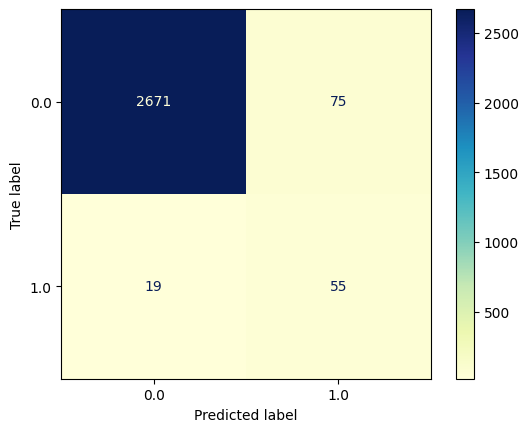

Model saved as gradient_boosting_model.pkl


In [29]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier()
evaluate_model(gradient_boosting, "Gradient Boosting")


## **Gaussian Naive Bayes Model**

Gaussian Naive Bayes
              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90      2746
         1.0       0.12      0.82      0.20        74

    accuracy                           0.83      2820
   macro avg       0.55      0.83      0.55      2820
weighted avg       0.97      0.83      0.89      2820



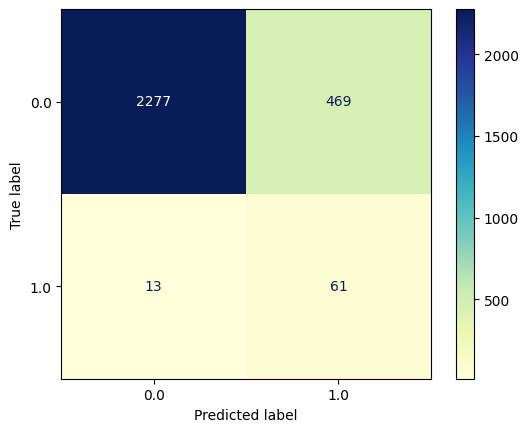

Model saved as gaussian_naive_bayes_model.pkl


In [30]:
from sklearn.naive_bayes import GaussianNB

gaussian_nb = GaussianNB()
evaluate_model(gaussian_nb, "Gaussian Naive Bayes")


## **MLP (Multi-layer Perceptron) Model**

Multi-layer Perceptron
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2746
         1.0       0.51      0.74      0.61        74

    accuracy                           0.97      2820
   macro avg       0.75      0.86      0.80      2820
weighted avg       0.98      0.97      0.98      2820



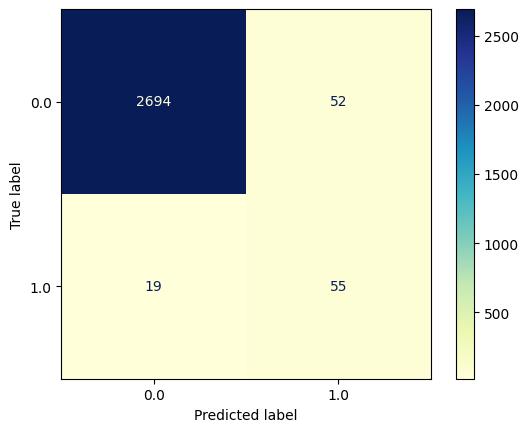

Model saved as multi-layer_perceptron_model.pkl


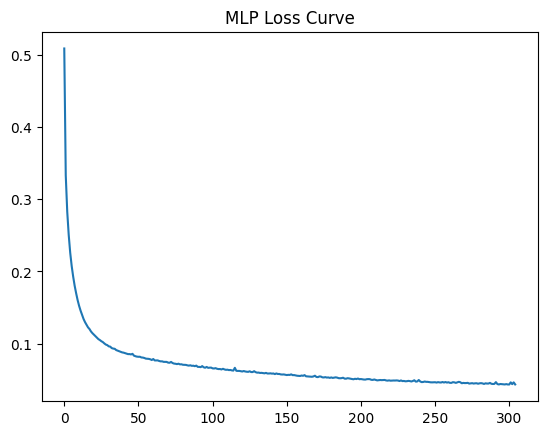

In [31]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=1, max_iter=600, learning_rate="invscaling")
evaluate_model(mlp, "Multi-layer Perceptron")
plt.plot(mlp.loss_curve_)
plt.title("MLP Loss Curve")
plt.show()

In [32]:
model_performance

,Accuracy,Precison,Recall,F1-Score,Training time,Prediction time
Decision Tree,0.964184,0.976606,0.964184,0.969094,0.069785,0.001996
k-NN,0.974468,0.973799,0.974468,0.974123,0.015961,0.200503
Random Forest,0.979433,0.979705,0.979433,0.979566,0.473862,0.026696
Gradient Boosting,0.966667,0.977983,0.966667,0.971070,2.754236,0.004987
Gaussian Naive Bayes,0.829078,0.971251,0.829078,0.885860,0.004175,0.001506
Multi-layer Perceptron,0.974823,0.980428,0.974823,0.977042,15.803440,0.001995
